It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

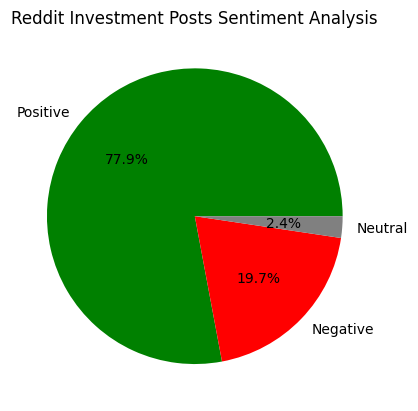

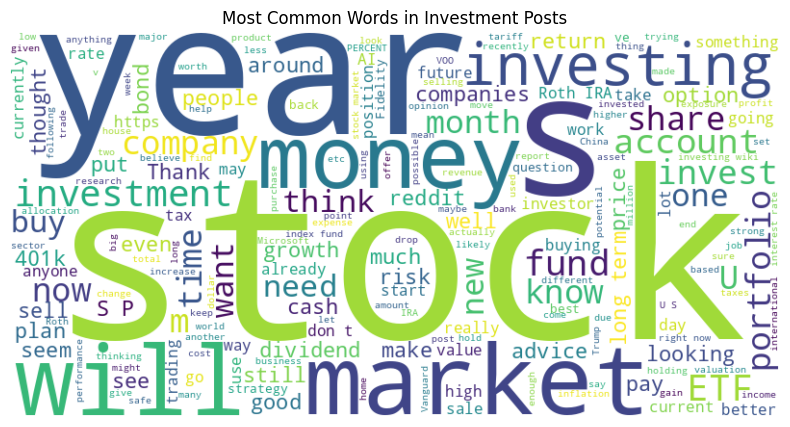

Analiz tamamlandı ve csv olarak kaydedildi!


In [ ]:
import praw
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

reddit = praw.Reddit(
    client_id='kJMakKsVa68bkfWg5xr4nQ',
    client_secret='2aRyHr5aJJSIFbfNrUk8s2RRDdihFQ',
    user_agent='odev/1.0 (by u/Fabulous_Cold_2392'
)

subreddit = reddit.subreddit('investing')
posts = []
for post in subreddit.hot(limit=2000):  # En popüler 2000 postu al
    posts.append([post.title, post.selftext])

df = pd.DataFrame(posts, columns=['Title', 'Body'])
df['Text'] = df['Title'] + ' ' + df['Body']  # Başlık ve içeriği birleştir

df.drop(columns=['Title', 'Body'], inplace=True)


analyzer = SentimentIntensityAnalyzer()
df['Sentiment'] = df['Text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
df['Sentiment Label'] = df['Sentiment'].apply(lambda x: 'Positive' if x > 0.05 else ('Negative' if x < -0.05 else 'Neutral'))


df['Sentiment Label'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['green', 'red', 'gray'])
plt.title('Reddit Investment Posts Sentiment Analysis')
plt.ylabel('')
plt.show()


text = ' '.join(df['Text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Investment Posts')
plt.show()


df.to_csv('reddit_sentiment_analysis.csv', index=False)
print("Analiz tamamlandı ve csv olarak kaydedildi!")


In [6]:
pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.1 MB/s eta 0:00:00
